In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

# Initial Setup

In [120]:
sdf = src.read_csv('../Data/results/kelvin_helmholtz/final.csv')
sdf.params={'mass':0.00075}
sdf

,x,y,vx,vy,u,h,rho
0,0.999991,1.000000,-0.047547,0.037824,5.113134,0.018342,1.316717
1,0.999789,0.774532,-0.271925,0.058177,3.214949,0.021682,1.531586
2,0.999707,0.005189,-0.171065,0.014350,3.284533,0.027658,0.940743
3,0.999801,0.771497,-0.127574,-0.447499,3.599800,0.021931,1.496933
4,0.000013,0.035811,0.089175,-0.069759,4.093787,0.030088,0.794673
...,...,...,...,...,...,...,...
2995,0.031439,0.647474,0.726774,-0.091783,1.848921,0.048000,2.303341
2996,0.030507,0.670777,0.684290,0.087204,1.833195,0.048000,2.239264
2997,0.028215,0.693394,0.500509,0.199308,1.794791,0.048000,2.140371
2998,0.028531,0.694267,0.439317,-0.148130,1.928826,0.048000,2.142616


<Axes: xlabel='x', ylabel='y'>

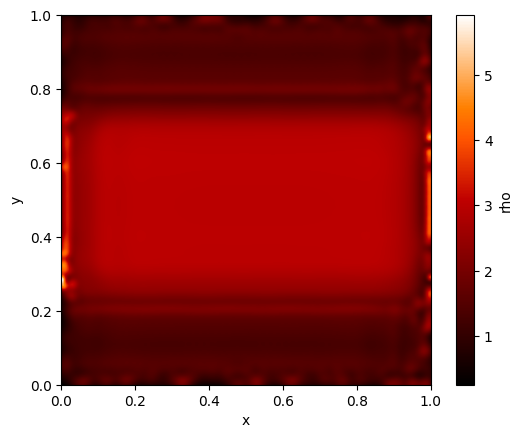

In [121]:
sdf.render('rho', xsec=1.0)

# Final Setup

In [122]:
sdft = src.read_csv('../Data/results/kelvin_helmholtz/final.csv')
sdft

,x,y,vx,vy,u,h,rho
0,0.999991,1.000000,-0.047547,0.037824,5.113134,0.018342,1.316717
1,0.999789,0.774532,-0.271925,0.058177,3.214949,0.021682,1.531586
2,0.999707,0.005189,-0.171065,0.014350,3.284533,0.027658,0.940743
3,0.999801,0.771497,-0.127574,-0.447499,3.599800,0.021931,1.496933
4,0.000013,0.035811,0.089175,-0.069759,4.093787,0.030088,0.794673
...,...,...,...,...,...,...,...
2995,0.031439,0.647474,0.726774,-0.091783,1.848921,0.048000,2.303341
2996,0.030507,0.670777,0.684290,0.087204,1.833195,0.048000,2.239264
2997,0.028215,0.693394,0.500509,0.199308,1.794791,0.048000,2.140371
2998,0.028531,0.694267,0.439317,-0.148130,1.928826,0.048000,2.142616


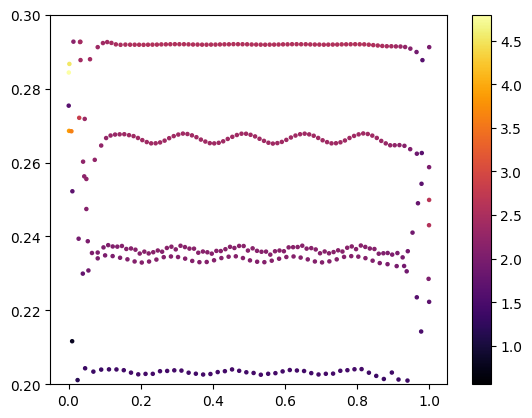

In [129]:
plt.scatter(sdft['x'], sdft['y'], c=sdft['rho'], cmap='inferno', s=5)
plt.colorbar()
plt.ylim(0.2, 0.3)
plt.show()

# Angular Momentum's Conservation

In [47]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [132]:
T = 65
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

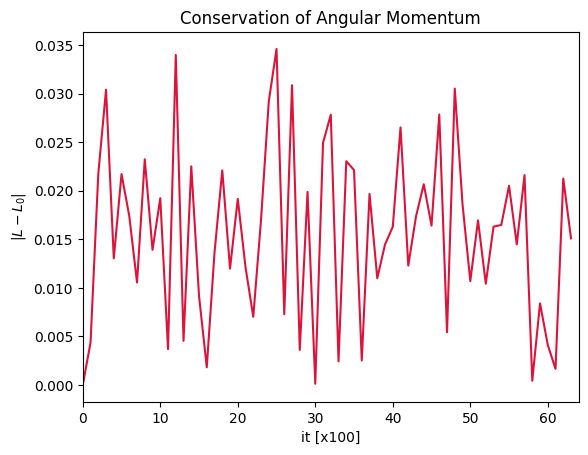

In [133]:
plt.plot(time[:-1], np.abs((ang_mom[:-1]-ang_mom[0])/ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel("$|L-L_0|$")
plt.xlim(0, T-1)
plt.show()

# Conservation of Energy

In [98]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [134]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

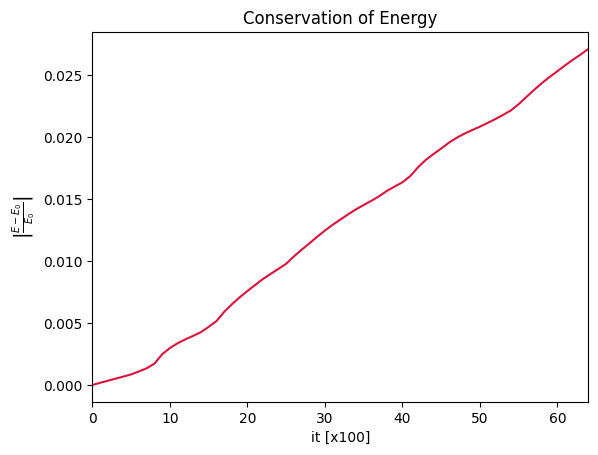

In [135]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()